# Use case alcyon-e: locationmaison.fr
**by Baptiste Pilloy**
- Delivery schedulded for the 6/10 at 9am
- To jump directly to the prediction section, follow this <a href=#pred>link</a><br />

In [1]:
#------------------------------
# Import libraries:
#------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn as default plot style
sns.set()

## 1. Import data

In [2]:
#------------------------------
# Read data:
#------------------------------


def read_data():
    data = pd.read_csv('location.csv')
    print('Data imported with sucess')
    print('------------------------------')
    return data


data = read_data()

Data imported with sucess
------------------------------


## 2. Discover data

In [3]:
data.head()

,type_propriete,quartier,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
0,Complète,Observatoire,75014,2,1.0,NaN,1.0,60.0,9,100.0,34.0
1,Complète,Hôtel-de-Ville,75004,4,1.0,2.0,2.0,90.0,272,94.0,119.0
2,Complète,Opéra,75009,2,1.0,1.0,1.0,130.0,6,96.0,64.0
3,Complète,Popincourt,75011,2,1.0,1.0,1.0,75.0,26,98.0,91.0
4,Chambre privée,Entrepôt,75010,6,1.0,1.0,3.0,170.0,149,92.0,66.0


In [4]:
#------------------------------
# List features:
#------------------------------

print('The',len(data.columns.values),' data features are:\n')
print(data.columns.values)
print('\n' ,'------------------------------', '\n')

The 11  data features are:

['type_propriete' 'quartier' 'arrondissement' 'capacite_accueil'
 'salle_de_bain' 'chambres' 'lits' 'prix' 'nb_commentaires' 'note_moyenne'
 'nb_mois_en_activite']

 ------------------------------ 



In [5]:
#------------------------------
# Infos on features:
#------------------------------

data.info()
print('\n' ,'------------------------------', '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41438 entries, 0 to 41437
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type_propriete       41438 non-null  object 
 1   quartier             41438 non-null  object 
 2   arrondissement       41438 non-null  int64  
 3   capacite_accueil     41438 non-null  int64  
 4   salle_de_bain        41438 non-null  float64
 5   chambres             33214 non-null  float64
 6   lits                 41293 non-null  float64
 7   prix                 41438 non-null  float64
 8   nb_commentaires      41438 non-null  int64  
 9   note_moyenne         32413 non-null  float64
 10  nb_mois_en_activite  33167 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 3.5+ MB

 ------------------------------ 



### Features analysis

- Features type:
    - Categorical:
        - type_propriete (nominal)
        - quartier (nominal)
    - Numerical:
         - arrondissement (discrete)
         - capacite_accueil (discrete)
         - salle_de_bain (discrete)
         - chambres (discrete)
         - lits (discrete)
         - prix (discrete)
         - nb_commentaires (discrete)
         - note_moyenne (discrete)
         - nb_mois_en_activite (discrete)


In [6]:
#check for empty columns
def missingCheck(dataframe):
    for column in dataframe.columns:
        missing = dataframe[column].isna().sum() / dataframe.shape[0]
    
        print(f"{column:{20}}: ==============> Missing {missing * 100:.2f}%")

In [7]:
missingCheck(data)
print('\n' ,'------------------------------', '\n')

type_propriete      : ==============> Missing 0.00%
quartier            : ==============> Missing 0.00%
arrondissement      : ==============> Missing 0.00%
capacite_accueil    : ==============> Missing 0.00%
salle_de_bain       : ==============> Missing 0.00%
chambres            : ==============> Missing 19.85%
lits                : ==============> Missing 0.35%
prix                : ==============> Missing 0.00%
nb_commentaires     : ==============> Missing 0.00%
note_moyenne        : ==============> Missing 21.78%
nb_mois_en_activite : ==============> Missing 19.96%

 ------------------------------ 



**Insight**
<br>
There is no column with more than 80% missing values: we will probably keep them all for the modeling part.

In [8]:
print(data.isnull().sum())
print('\n' ,'------------------------------', '\n')

type_propriete            0
quartier                  0
arrondissement            0
capacite_accueil          0
salle_de_bain             0
chambres               8224
lits                    145
prix                      0
nb_commentaires           0
note_moyenne           9025
nb_mois_en_activite    8271
dtype: int64

 ------------------------------ 



In [9]:
#------------------------------
# Analyse numerical data distribution:
#------------------------------

data.describe()

,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
count,41438.000000,41438.000000,41438.000000,33214.000000,41293.000000,41438.000000,41438.000000,32413.000000,33167.000000
mean,75012.288962,3.096843,1.121531,1.387246,1.691183,108.505309,20.549471,93.605004,20.788977
std,5.515351,1.609637,0.374932,0.714914,1.103502,171.468815,42.118658,8.079865,22.775596
min,75001.000000,1.000000,0.000000,1.000000,0.000000,8.000000,0.000000,20.000000,0.000000
25%,75009.000000,2.000000,1.000000,1.000000,1.000000,59.000000,1.000000,91.000000,2.000000
50%,75012.000000,2.000000,1.000000,1.000000,1.000000,80.000000,6.000000,96.000000,13.000000
75%,75017.000000,4.000000,1.000000,2.000000,2.000000,118.000000,21.000000,100.000000,32.000000
max,75020.000000,16.000000,6.000000,9.000000,16.000000,9280.000000,796.000000,100.000000,134.000000


### Numerical data distribution analysis
- More than 75% of the housing offer less than 4 people carrying capacity. The maximum people carrying capacity is 16. The average is 3 people.
- More than 75% of housing offer at least one bathroom.
- There is missing values for the number of bedroooms. When this feature is provided in the dataset, the minimum value is one room per housing. We could make the hypothesis that when bedroom feature is missing, there is no bedroom in the housing but a convertible sofa. Hypothesis to be confirmed.
- There is missing values for the number of beds. The minimum value is 0 bed. The average number of bed is 1.7 wheras the average carrying capacity is 3.1. This difference can be explained by the use of double beds.
- There are some outliers in the price feature. More than 75% of housing cost less than 118 euros (we assume the price unit is euros).
- There are some outliers in the number of comment feature. Some housing have no comment at all. 75% of the housing have less than 21 comments.
- There are some missing notes. More than 75% of the housing get notes above 91%.
- There are some outliers in the number of in activity months feature.

**Insight**:
- We will probabliy delete the outliers from the dataset to get better data consistence for the modeling part.

In [10]:
#------------------------------
# Analyse categorical data distribution:
#------------------------------
data.describe(include=['O'])

,type_propriete,quartier
count,41438,41438
unique,2,20
top,Complète,Buttes-Montmartre
freq,37484,5029


In [11]:
data.arrondissement.astype('string').describe(include=['O'])

count     41438
unique       20
top       75018
freq       5029
Name: arrondissement, dtype: object

### Categorical data distribution analysis
- There are 2 different type_propriete. 90% of housing are 'Complète'. 10% are 'Chambre privée'.
- There is housing in each quarters of Paris. The most present quarter is 'Buttes-Montmartre' with 12% of the housing.
- The quarter feature seams to correspond to he 'arrondissement' features. We get exactly the same number of 'arrondissement' and the same percentage for the most represented 'arrondissement' than the quarter feature.

**Insight**:
- Any column of the dataset represents a unique index. It is not an issue for the moment. It is similar to an anonymised dataset: we will not be able to identify exactly the housing from the list.

In [12]:
data.groupby(['quartier','arrondissement']).count().sort_values(by='arrondissement')

,,type_propriete,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
quartier,arrondissement,,,,,,,,,
Louvre,75001,833,833,833,664,828,833,833,668,679
Bourse,75002,1418,1418,1418,1096,1415,1418,1418,1151,1168
Temple,75003,1928,1928,1928,1512,1925,1928,1928,1610,1631
Hôtel-de-Ville,75004,1342,1342,1342,1050,1336,1342,1342,1067,1084
Panthéon,75005,1279,1279,1279,991,1276,1279,1279,1035,1051
Luxembourg,75006,1043,1043,1043,802,1041,1043,1043,832,847
Palais-Bourbon,75007,963,963,963,735,955,963,963,729,749
Élysée,75008,908,908,908,723,906,908,908,687,706
Opéra,75009,1862,1862,1862,1511,1851,1862,1862,1460,1485


**Insight**
<br>
'quartier' and 'arrondissement' corresponds to the same information. We will probably drop one of this useless column.

## 3. Exploratory Data Analysis

In [13]:
data.head()

,type_propriete,quartier,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
0,Complète,Observatoire,75014,2,1.0,NaN,1.0,60.0,9,100.0,34.0
1,Complète,Hôtel-de-Ville,75004,4,1.0,2.0,2.0,90.0,272,94.0,119.0
2,Complète,Opéra,75009,2,1.0,1.0,1.0,130.0,6,96.0,64.0
3,Complète,Popincourt,75011,2,1.0,1.0,1.0,75.0,26,98.0,91.0
4,Chambre privée,Entrepôt,75010,6,1.0,1.0,3.0,170.0,149,92.0,66.0


In this EDA, we first focus on the link between features towards price target.

In [14]:
# functions to help to understand links between features for price contexte

def target_bar_plot(feature):
    target_column = 'prix'
    plt.figure(figsize = (10,5))
    sns.barplot(data = data , x = feature , y = target_column).set_title(f'{feature} / {target_column}')
    plt.show()
    
    return data[[feature, target_column]].groupby([feature], as_index=False).mean().sort_values(by=target_column, ascending=False).style.background_gradient(low=0.75,high=1, subset=[target_column])


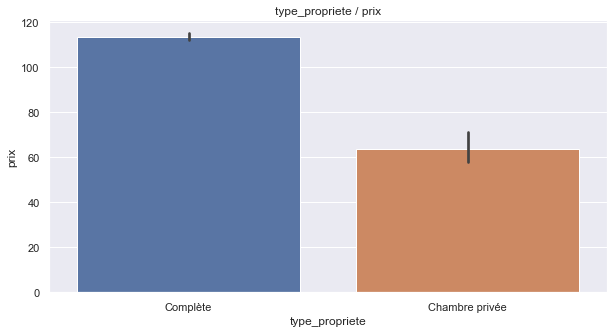

,type_propriete,prix
1,Complète,113.249013
0,Chambre privée,63.534901


In [15]:
target_bar_plot('type_propriete')

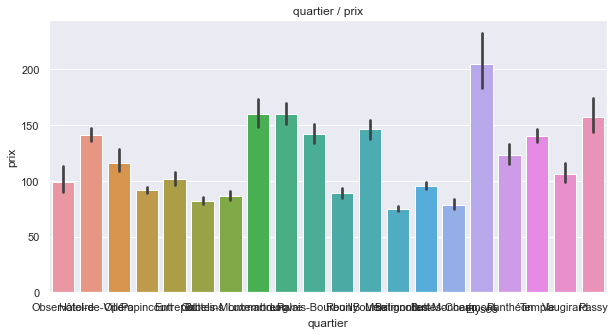

,quartier,prix
19,Élysée,205.025330
7,Louvre,159.969988
8,Luxembourg,159.946309
14,Passy,157.654267
1,Bourse,146.148096
12,Palais-Bourbon,142.082035
6,Hôtel-de-Ville,141.152757
17,Temple,140.380187
13,Panthéon,122.955434
11,Opéra,116.292159


In [16]:
target_bar_plot('quartier')

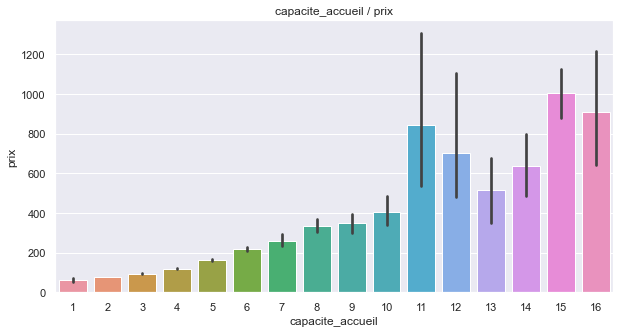

,capacite_accueil,prix
14,15,1006.954545
15,16,910.941176
10,11,845.259259
11,12,702.563636
13,14,637.200000
12,13,513.727273
9,10,406.230216
8,9,348.621212
7,8,334.815175
6,7,258.295238


In [17]:
target_bar_plot('capacite_accueil')

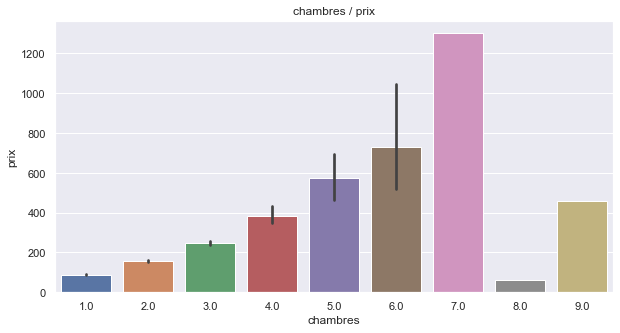

,chambres,prix
6,7.000000,1300.000000
5,6.000000,731.526316
4,5.000000,574.777778
8,9.000000,460.000000
3,4.000000,385.604869
2,3.000000,247.108250
1,2.000000,156.401892
0,1.000000,88.168772
7,8.000000,60.000000


In [18]:
target_bar_plot('chambres')

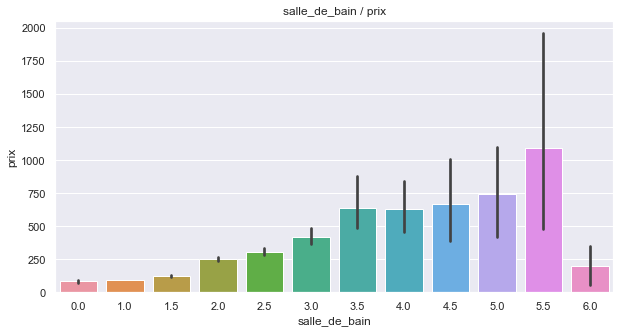

,salle_de_bain,prix
10,5.500000,1087.500000
9,5.000000,741.384615
8,4.500000,667.333333
6,3.500000,640.274510
7,4.000000,630.703704
5,3.000000,421.131086
4,2.500000,306.253731
3,2.000000,251.454143
11,6.000000,202.500000
2,1.500000,124.372868


In [19]:
target_bar_plot('salle_de_bain')

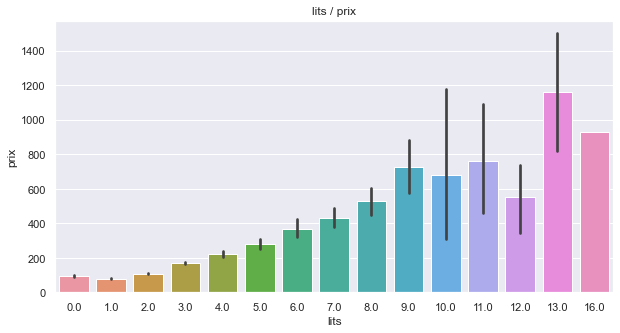

,lits,prix
13,13.000000,1159.000000
14,16.000000,929.000000
11,11.000000,761.375000
9,9.000000,727.864865
10,10.000000,677.500000
12,12.000000,553.833333
8,8.000000,528.740000
7,7.000000,432.440476
6,6.000000,366.784946
5,5.000000,278.666126


In [20]:
target_bar_plot('lits')

<AxesSubplot:>

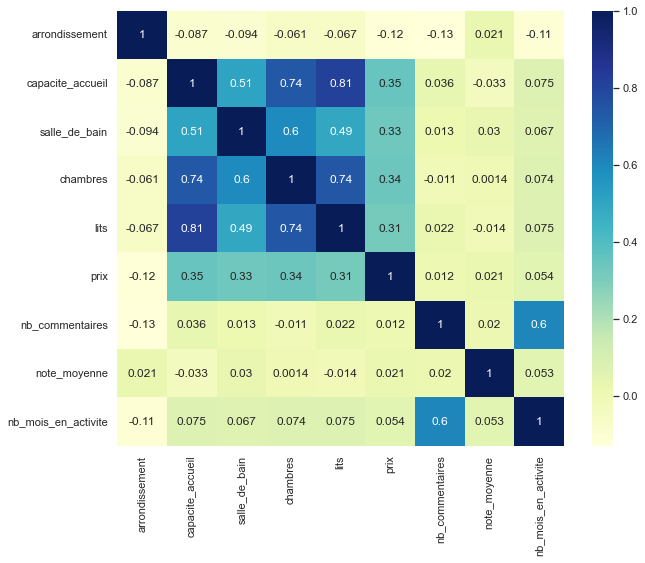

In [21]:
#------------------------------
# Check features correlations:
#------------------------------

sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

**Insights**
<br>
'capacite_accueil' has high correlation with several other features.
For example, there is a high coorelation between 'lits' and 'capacite_accueil' and it is logical since both features are directly linked.

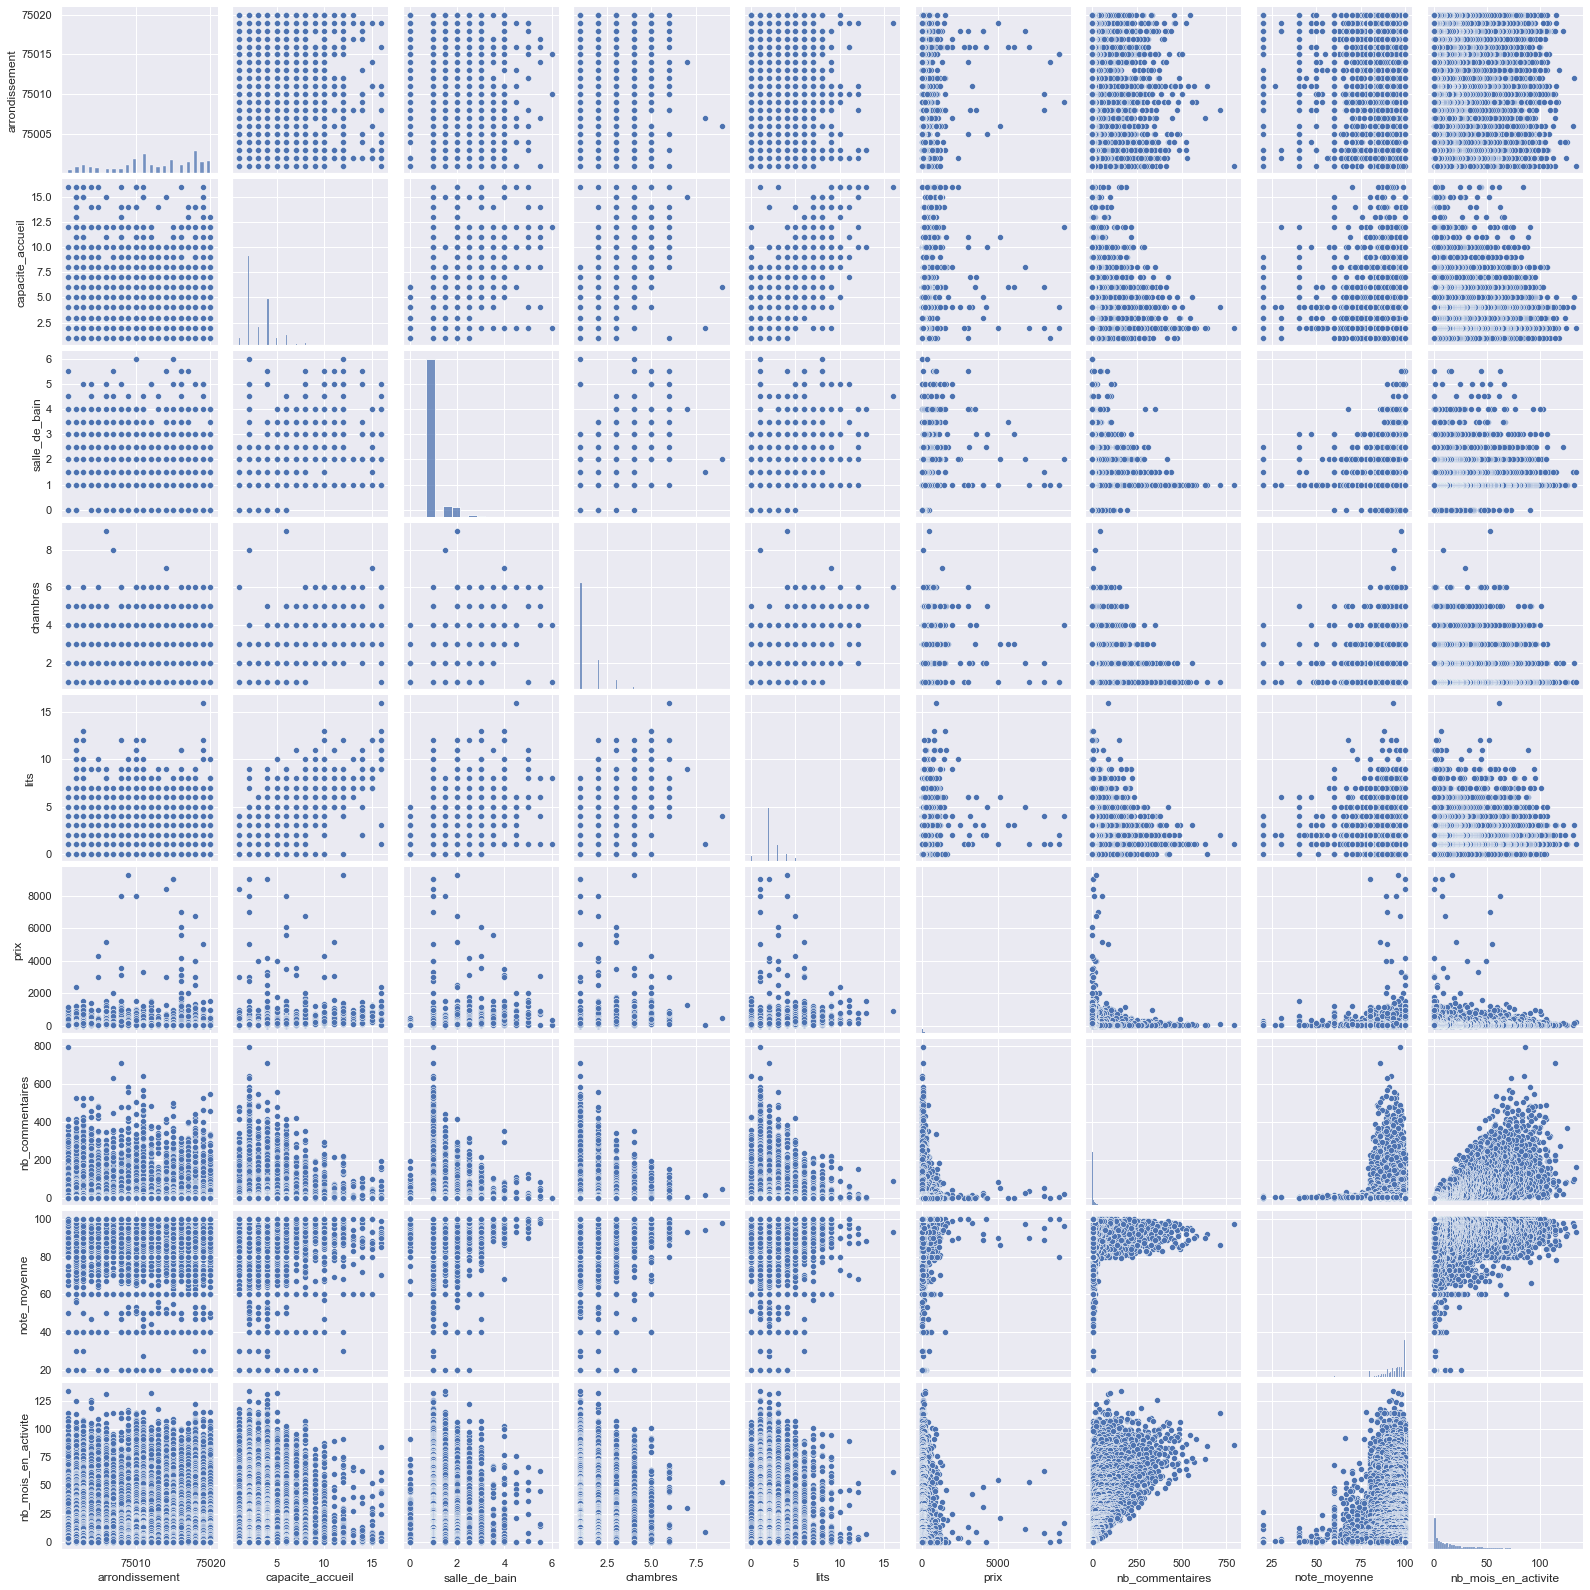

In [22]:
#dependance between features
sns.pairplot(data=data)
plt.show()

**Insights**
<br>
The paiplot gives us information about scatter repartition of features. We can identify patterns for nb_commentaires, note_moyenne and nb_mois_en_activite.

## 4. What is the optimal number of bedrooms/beds/bathrooms?
- What does mean 'optimal' in this question ? Because the aim of the client is to evaluate the size of the market, in this case, we will consider 'optimal' means the highest amount of housing.
- We will look for the number of bedrooms/beds/bathrooms which corresponds to the highest housing offer.

In [23]:
data['chambres'].value_counts().head(3)

1.0    23908
2.0     6554
3.0     2097
Name: chambres, dtype: int64

In [24]:
data['lits'].value_counts().head(3)

1.0    21727
2.0    12039
3.0     3765
Name: lits, dtype: int64

In [25]:
data['salle_de_bain'].value_counts().head(3)

1.0    35735
1.5     2462
2.0     2257
Name: salle_de_bain, dtype: int64

**Answer**
<br>
The optimal number of bedrooms/beds/bathrooms is
- bedrooms = 1
- beds = 1
- bathrooms = 1

I am a bit confused with this question. I am not sure to get the right purpose.

## 5. What is the optimal price interval?


In [26]:
#data preparation: creating bands for price with 10 quartils bands distribution
data['prixBand'] = pd.qcut(data['prix'], 10, precision=0)

In [27]:
data.groupby(['prixBand'], as_index=False)['prix'].count().sort_values(by='prixBand', ascending=True)

,prixBand,prix
0,"(7.0, 44.0]",4201
1,"(44.0, 52.0]",4129
2,"(52.0, 60.0]",4357
3,"(60.0, 70.0]",4683
4,"(70.0, 80.0]",4459
5,"(80.0, 90.0]",3484
6,"(90.0, 103.0]",3746
7,"(103.0, 130.0]",4477
8,"(130.0, 181.0]",3770
9,"(181.0, 9280.0]",4132


In [28]:
data['prixBand'].value_counts().head(3)

(60.0, 70.0]      4683
(103.0, 130.0]    4477
(70.0, 80.0]      4459
Name: prixBand, dtype: int64

**Answer**
<br>
The optimal price interval (same approcah as the previous question) is
- 60-70 €

This band width is acceptable (10€).

**Insights**
<br>
The EDA and this questions give us information about the market. The optimal price interval and the optimal number of bedrooms, beds, bathrooms provide market insights.

If our client focus on this kind of housing and this price interval (maybe a bit lower to be under the market price), he will meet the market.

If he wants to start on a different business strategy like only get a few housing but with high prices, the analysis would have been different.

Moreover, in this question we did not take into account the note and number of comment. We could have create an 'satisfaction_indicator' (for example satisfaction_indicator = nb_commentaires * note_moyenne) and try to identify the optimal features for housing with high 'satisfaction_indicator'.

## 6. Data preparation


In [29]:
#------------------------------
# Drop useless columns:
#------------------------------

data.drop(columns = ['quartier','prixBand'] , inplace = True)
#data.drop(columns = ['quartier'] , inplace = True)

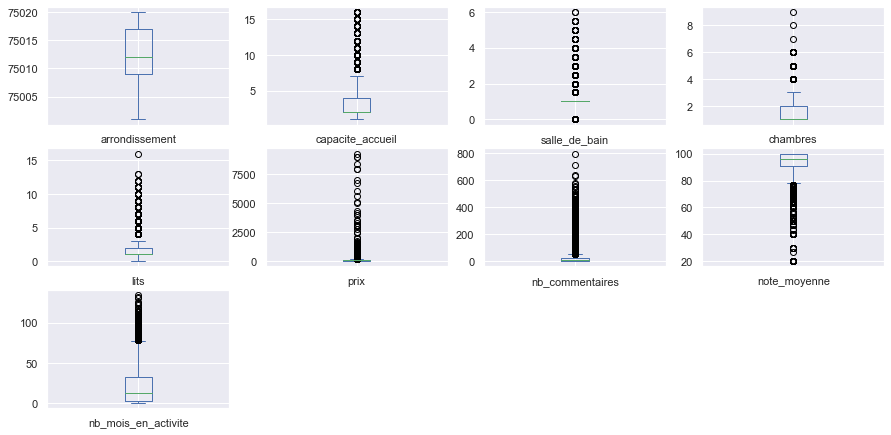

In [30]:
#------------------------------
# Detect Outliers:
#------------------------------

data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

**Insights**
<br>
Outliers will lead to modeling issues. In this first approach (because client needs quick delivery), we will get rid of outliers which creates overfitting.

In [31]:
#------------------------------
# Treat Outliers:
#------------------------------


data=data[data['prix'] < data['prix'].quantile(0.9)]
data=data[data['nb_commentaires'] < data['nb_commentaires'].quantile(0.9)]
data=data[data['note_moyenne'] > data['note_moyenne'].quantile(0.1)]
data=data[data['nb_mois_en_activite'] < data['nb_mois_en_activite'].quantile(0.9)]


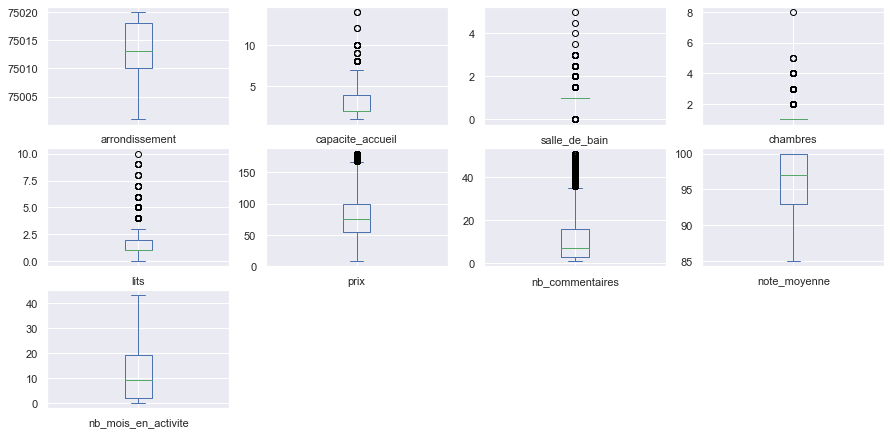

In [32]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

In [33]:
#------------------------------
# Convert categorical features to numerical + filling missing values:
#------------------------------

data.head()

,type_propriete,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
0,Complète,75014,2,1.0,NaN,1.0,60.0,9,100.0,34.0
21,Complète,75020,5,1.0,2.0,4.0,120.0,7,91.0,25.0
23,Chambre privée,75020,2,1.0,1.0,1.0,50.0,10,94.0,32.0
24,Complète,75020,4,1.0,1.0,2.0,75.0,17,98.0,28.0
25,Complète,75017,4,1.0,1.0,2.0,115.0,1,100.0,0.0


In [34]:
print(data.isnull().sum())
print('\n' ,'------------------------------', '\n')

type_propriete            0
arrondissement            0
capacite_accueil          0
salle_de_bain             0
chambres               4533
lits                     45
prix                      0
nb_commentaires           0
note_moyenne              0
nb_mois_en_activite       0
dtype: int64

 ------------------------------ 



### type_propriete

In [35]:
data['type_propriete'] = data['type_propriete'].map({'Complète':0,'Chambre privée':1}).astype(int)

### chambres

In [36]:
data[data['chambres'].isnull()].groupby('type_propriete', dropna=False).count()

,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
type_propriete,,,,,,,,,
0,4466,4466,4466,0,4455,4466,4466,4466,4466
1,67,67,67,0,67,67,67,67,67


In [37]:
#for hounsing with 'Chambres privée' type we will set the number of bedrooms to 0
data.loc[(data['chambres'].isnull())&(data['type_propriete']==1),'chambres'] = 0

In [38]:
data[(data['chambres'].isnull())&(data['type_propriete']==0)].groupby('capacite_accueil', dropna=False).count()

,type_propriete,arrondissement,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
capacite_accueil,,,,,,,,,
1,232,232,232,0,232,232,232,232,232
2,3566,3566,3566,0,3555,3566,3566,3566,3566
3,370,370,370,0,370,370,370,370,370
4,286,286,286,0,286,286,286,286,286
5,7,7,7,0,7,7,7,7,7
6,5,5,5,0,5,5,5,5,5


In [39]:
#for complete housing with 'capacite_accueil' above 1, we will fill empty values with the default value: 1 bedroom
data.loc[(data['chambres'].isnull())&(data['type_propriete']==0),'chambres'] = 1

### lits

In [40]:
data[data['lits'].isnull()].groupby('capacite_accueil', dropna=False).count()

,type_propriete,arrondissement,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
capacite_accueil,,,,,,,,,
1,4,4,4,4,0,4,4,4,4
2,39,39,39,39,0,39,39,39,39
3,1,1,1,1,0,1,1,1,1
4,1,1,1,1,0,1,1,1,1


In [41]:
#for housing with 'capacite_accueil' of 1 we will set the numer of empty 'lits' at 1
#                      -             of 2 we will set the numer of empty 'lits' at 1 (double bed hypothesis)
#                      -             of 3 we will set the numer of empty 'lits' at 2 (simple + double bed hypothesis)
#                      -             of 4 we will set the numer of empty 'lits' at 2 (2*double bed hypothesis)
#                      -             of 5 we will set the numer of empty 'lits' at 3 (simple + 2*double bed hypothesis)
#                      -             of 16 we will set the numer of empty 'lits' at 8 (8*double bed hypothesis)

data.loc[(data['lits'].isnull())&(data['capacite_accueil']==1),'lits'] = 1
data.loc[(data['lits'].isnull())&(data['capacite_accueil']==2),'lits'] = 1
data.loc[(data['lits'].isnull())&(data['capacite_accueil']==3),'lits'] = 2
data.loc[(data['lits'].isnull())&(data['capacite_accueil']==4),'lits'] = 2
data.loc[(data['lits'].isnull())&(data['capacite_accueil']==5),'lits'] = 3
data.loc[(data['lits'].isnull())&(data['capacite_accueil']==16),'lits'] = 8


### note_moyenne

In [42]:
data[data['note_moyenne'].isnull()].groupby('nb_mois_en_activite', dropna=False).count()

,type_propriete,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne
nb_mois_en_activite,,,,,,,,,


In [43]:
#for missing values, we will take a default value of the average 'note_moyenne'

print(data['note_moyenne'].dropna().mean())
data.loc[(data['note_moyenne'].isnull()),'note_moyenne'] = data['note_moyenne'].dropna().mean()

95.83326800587948


In [44]:
data[data['nb_mois_en_activite'].isnull()].groupby('nb_commentaires', dropna=False).count()

,type_propriete,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,note_moyenne,nb_mois_en_activite
nb_commentaires,,,,,,,,,


In [45]:
#for missing values, we will take a default value of 0
data.loc[(data['nb_mois_en_activite'].isnull()),'nb_mois_en_activite'] = 0

In [46]:
print(data.isnull().sum())
print('\n' ,'------------------------------', '\n')

type_propriete         0
arrondissement         0
capacite_accueil       0
salle_de_bain          0
chambres               0
lits                   0
prix                   0
nb_commentaires        0
note_moyenne           0
nb_mois_en_activite    0
dtype: int64

 ------------------------------ 



**Insights**
<br>
No more missing values!

## 7. Modeling with classical linear regression
We will consider several models and will choose the one with the highest performance. We will use RMSE as persormance criterium.

In [47]:
#libraries for data prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, learning_curve

#libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#libraries for results analysis
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [48]:
#modeling parameters
kfold = StratifiedKFold(n_splits=5)
random_state = 2

In [49]:
X = data.copy()
y = X.pop('prix')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=random_state)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print(f"X_train shape is = {X_train.shape}" )
print(f"y_train shape is = {y_train.shape}" )
print('------------------------------------')
print(f"X_test shape is = {X_test.shape}" )
print(f"y_test shape is = {y_test.shape}" )

X_train shape is = (15307, 9)
y_train shape is = (15307, 1)
------------------------------------
X_test shape is = (5103, 9)
y_test shape is = (5103, 1)


In [51]:
#scale data for modeling
#sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
#y_train = sc.fit_transform(y_train)
#y_test = sc.fit_transform(y_test)

In [52]:
#creating model
lm = make_pipeline(StandardScaler(),
                    LinearRegression())
lm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [55]:
pred = lm.predict(X_test)
pred = pred.reshape(-1,1)

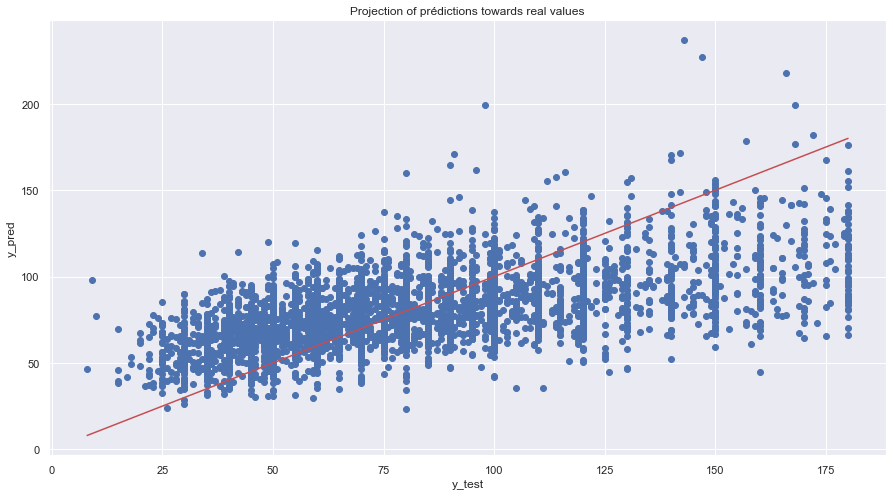

In [56]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection of prédictions towards real values")
plt.show()

In [57]:
#we definfe a function to get access to MAE, MSE, MAPE, RMSE
def metrics_function(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(diff / y_true)) * 100
    dict_metrics = {"Métrique":["MAE", "MSE", "RMSE", "MAPE"], "Résultats":[mae, mse, rmse, mape]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [58]:
metrics_lr = metrics_function(y_test, pred)
metrics_lr

,Métrique,Résultats
0,MAE,21.085308
1,MSE,752.077634
2,RMSE,27.424034
3,MAPE,30.233507


## 8. Modeling with ridge linear regression

In [59]:
#libraries for modeling
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet


In [60]:
X = data.copy()
y = X.pop('prix')
X.head()

,type_propriete,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,nb_commentaires,note_moyenne,nb_mois_en_activite
0,0,75014,2,1.0,1.0,1.0,9,100.0,34.0
21,0,75020,5,1.0,2.0,4.0,7,91.0,25.0
23,1,75020,2,1.0,1.0,1.0,10,94.0,32.0
24,0,75020,4,1.0,1.0,2.0,17,98.0,28.0
25,0,75017,4,1.0,1.0,2.0,1,100.0,0.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=random_state)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print(f"X_train shape is = {X_train.shape}" )
print(f"y_train shape is = {y_train.shape}" )
print(f"X_test shape is = {X_test.shape}" )
print(f"y_test shape is = {y_test.shape}" )

X_train shape is = (15307, 9)
y_train shape is = (15307, 1)
X_test shape is = (5103, 9)
y_test shape is = (5103, 1)


In [62]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [63]:
#creating model
model_ridge = make_pipeline(StandardScaler(),
                    Ridge())

In [64]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50]

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

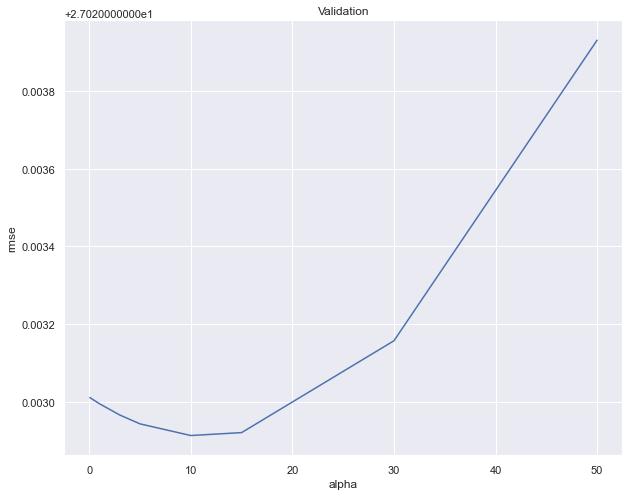

In [65]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [66]:
cv_ridge.min()

27.022913125232765

We choose the value of alpha to get the lowest value of rmse.

In [67]:
model_ridge = make_pipeline(StandardScaler(),
                    Ridge(alpha=27))
model_ridge.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=27))])

In [68]:
pred = model_ridge.predict(X_test)
pred = pred.reshape(-1,1)

In [69]:
metrics_ri = metrics_function(y_test, pred)
metrics_ri

,Métrique,Résultats
0,MAE,21.085731
1,MSE,752.056662
2,RMSE,27.423652
3,MAPE,30.237380


## 9. Modeling with lasso linear regression

In [70]:
from sklearn.linear_model import LassoCV, LassoLarsCV


In [71]:
#creating model
model_lasso = make_pipeline(StandardScaler(),
                    LassoCV(alphas = [1, 0.1, 0.001, 0.0005]))

model_lasso = model_lasso.fit(X_train, y_train)

/Users/baptistepilloy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
pred = model_lasso.predict(X_test)
pred = pred.reshape(-1,1)

In [73]:
metrics_la = metrics_function(y_test, pred)
metrics_la

,Métrique,Résultats
0,MAE,21.085374
1,MSE,752.079118
2,RMSE,27.424061
3,MAPE,30.233846


## 10. Modeling with scikit learn SGD regressor

In [74]:
from sklearn.linear_model import SGDRegressor

In [75]:
#model creation
model_SDG_reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
model_SDG_reg.fit(X_train, y_train)

/Users/baptistepilloy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [76]:
pred = model_SDG_reg.predict(X_test)
pred = pred.reshape(-1,1)

In [77]:
metrics_SGD_reg = metrics_function(y_test, pred)
metrics_SGD_reg

,Métrique,Résultats
0,MAE,21.155942
1,MSE,753.721712
2,RMSE,27.453993
3,MAPE,30.429251


## 11. Modeling with scikit learn random forest


In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
#model creation
model_forest_reg = make_pipeline(StandardScaler(),
                    RandomForestRegressor(n_estimators=5, random_state=random_state))
model_forest_reg.fit(X_train, y_train)

/Users/baptistepilloy/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=5, random_state=2))])

In [80]:
pred = model_forest_reg.predict(X_test)
pred = pred.reshape(-1,1)

In [81]:
metrics_forest_reg = metrics_function(y_test, pred)
metrics_forest_reg

,Métrique,Résultats
0,MAE,23.439276
1,MSE,925.789878
2,RMSE,30.426795
3,MAPE,33.338119


## 12. Modeling with SGD

In [82]:
#libraries for modeling
from tensorflow import keras
from tensorflow.keras import layers

2022-10-06 09:27:57.493721: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [83]:
X = data.copy()
y = X.pop('prix')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=random_state)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print(f"X_train shape is = {X_train.shape}" )
print(f"y_train shape is = {y_train.shape}" )
print(f"X_test shape is = {X_test.shape}" )
print(f"y_test shape is = {y_test.shape}" )

X_train shape is = (15307, 9)
y_train shape is = (15307, 1)
X_test shape is = (5103, 9)
y_test shape is = (5103, 1)


In [85]:
input_shape = [X_train.shape[1]]
input_shape

[9]

In [96]:
# define the model
model_keras_SGD = keras.Sequential([
    
    # batchNorm because input data are not between -1 and 1
    layers.BatchNormalization(input_shape=input_shape),
    
    # the hidden ReLU layers
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    # the linear output layer 
    layers.Dense(1)
])

In [97]:
# optimizer, loss function definition
model_keras_SGD.compile(
    optimizer='adam',
    loss='mae',
)

Epoch 1/100
30/30 [==============================] - 0s 7ms/step - loss: 20.9647 - val_loss: 21.6093
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 20.9849 - val_loss: 21.3877
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 20.9699 - val_loss: 21.0914
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 20.9742 - val_loss: 21.6933
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 21.0417 - val_loss: 21.1294
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 20.9097 - val_loss: 21.3356
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 20.9231 - val_loss: 21.3012
Epoch 8/100
30/30 [==============================] - 0s 6ms/step - loss: 20.9178 - val_loss: 21.4111
Epoch 9/100
30/30 [==============================] - 0s 6ms/step - loss: 20.9341 - val_loss: 21.2993
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 20.9508 - val_lo

30/30 [==============================] - 0s 4ms/step - loss: 20.6872 - val_loss: 21.4219
Epoch 82/100
30/30 [==============================] - 0s 4ms/step - loss: 20.6342 - val_loss: 20.9116
Epoch 83/100
30/30 [==============================] - 0s 4ms/step - loss: 20.6001 - val_loss: 21.0229
Epoch 84/100
30/30 [==============================] - 0s 4ms/step - loss: 20.6075 - val_loss: 21.0315
Epoch 85/100
30/30 [==============================] - 0s 4ms/step - loss: 20.5490 - val_loss: 21.2489
Epoch 86/100
30/30 [==============================] - 0s 4ms/step - loss: 20.6345 - val_loss: 21.2589
Epoch 87/100
30/30 [==============================] - 0s 4ms/step - loss: 20.6204 - val_loss: 21.0454
Epoch 88/100
30/30 [==============================] - 0s 4ms/step - loss: 20.4822 - val_loss: 21.4655
Epoch 89/100
30/30 [==============================] - 0s 4ms/step - loss: 20.5510 - val_loss: 21.2584
Epoch 90/100
30/30 [==============================] - 0s 4ms/step - loss: 20.6219 - val_loss: 2

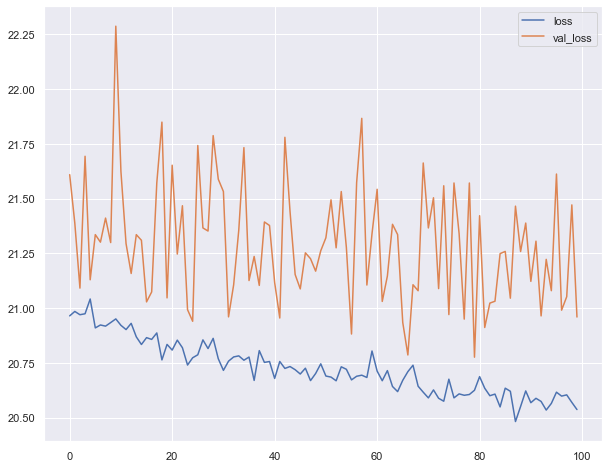

In [104]:
# modeling
early_stopping = keras.callbacks.EarlyStopping(
    patience=50,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model_keras_SGD.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

**Insights**
<br>
The SGD model converges. The loss is high because of the data quality. We would have better results with a higher dataset size.

In [105]:
pred = model_keras_SGD.predict(X_test)
pred = pred.reshape(-1,1)

160/160 [==============================] - 0s 1ms/step


In [106]:
metrics_keras_SGD = metrics_function(y_test, pred)
metrics_keras_SGD

,Métrique,Résultats
0,MAE,20.959378
1,MSE,796.015304
2,RMSE,28.213743
3,MAPE,27.375091


## 13. Client model
Several models have been tested. We choose the model which get the best performance.

In [108]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

/var/folders/1t/c_s2p8413310knqrk36ywszc0000gn/T/ipykernel_23669/2457485430.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [109]:
display_side_by_side([metrics_lr, metrics_ri, metrics_la, metrics_SGD_reg, metrics_forest_reg, metrics_keras_SGD],
                     ['Classical linear regression', 'Ridge', 'Lasso', 'Sklearn SGD', 'Random forest', 'Keras SGD'])

,Métrique,Résultats
0,MAE,21.085308
1,MSE,752.077634
2,RMSE,27.424034
3,MAPE,30.233507
,Métrique,Résultats
0,MAE,21.085731
1,MSE,752.056662
2,RMSE,27.423652
3,MAPE,30.237380
,Métrique,Résultats


**Insights**
<br>
Keras SGD gives us the best performance. We will use it for client prediction.

In [110]:
pred = model_keras_SGD.predict(X)

638/638 [==============================] - 1s 848us/step


In [111]:
df = pd.DataFrame({"Y_actual": y, "Y_pred" : pred.reshape(-1)})
df.head()

,Y_actual,Y_pred
0,60.0,71.084328
21,120.0,91.485794
23,50.0,40.470333
24,75.0,75.793518
25,115.0,72.633560


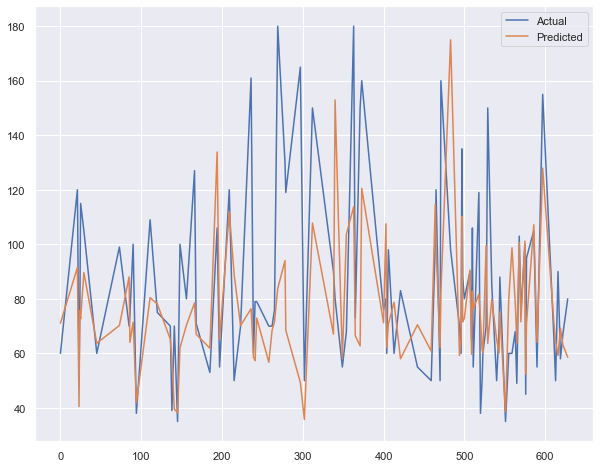

In [112]:
plt.figure(figsize=(10,8))
plt.plot(df[:100])
plt.legend(["Actual" , "Predicted"])

In [113]:
def your_prediction(input_for_prediction):
    
    to_be_predicted = pd.DataFrame(input_for_prediction).transpose()
    
    return print(f'The estimated price is : {model_keras_SGD.predict(to_be_predicted)[0][0]:.2f} €')

## 14. Prediction <a name='pred' />
A price prediction model has been developped with SGD modeling.
<br>
<br>
To get a prediction, insert values in the variable **input_for_prediction** using the following format:

In [114]:
X.head(1)

,type_propriete,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,nb_commentaires,note_moyenne,nb_mois_en_activite
0,0,75014,2,1.0,1.0,1.0,9,100.0,34.0


with 0 for **'Chambre privée'** and 1 for **'Complète'** in **'type_propriete'** feature.

In [117]:
input_for_prediction = [0, 75014, 2, 1, 1, 1, 9, 100, 34]

In [118]:
your_prediction(input_for_prediction)

1/1 [==============================] - 0s 24ms/step
The estimated price is : 71.08 €
